# How to Plot Duolingo Data

Here is how to see your duolingo activity over time.  You can get:

* total lessons
* total points
* days active
* score for each month
* tier for each month

## How do Get your Data

You can go to https://drive-thru.duolingo.com/ and download all your Duolingo history.

It will send you a zip file.  Most of what it sends you is not useful if all you want to know is your activity over time.

You can download this data and just import it into a spreadsheet if you don't know Python.  Then you can chart it there. For example, the data below is also in [this spreadsheet](https://docs.google.com/spreadsheets/d/1O5iMDR-Y5E_gS4Wu0sE84Rki8WrASRRamUmQhaNYNaU/edit?usp=sharing).

But if you know Python then run this notebook against that.  Adjust **folder_path** to where you unzipped your file.


In [146]:
import os
import pandas as pd

# Specify the folder path containing the CSV files
folder_path = '../../Downloads/duolingo'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Loop through each CSV file and load it into a Pandas DataFrame
dataframes = {}
for file in csv_files:
    
    file_path = os.path.join(folder_path, file)
    df_name = os.path.splitext(file)[0]  # Use the file name as the DataFrame name
    try:
        dataframes[df_name] = pd.read_csv(file_path)
    except:
        print("error with ", file)


error with  duolingo-english-test-profile.csv


In [134]:
# Here are your total points, total lessons, and days active.


languages=dataframes['languages'].loc[:,['points', 'total_lessons', 'days_active']]
languages.transpose()

,0
points,24408
total_lessons,578
days_active,335


In [135]:


leaderboard=dataframes['leaderboards'].loc[:,['timestamp','tier','score']]

leaderboard['timestamp'] = pd.to_datetime(leaderboard['timestamp'])
leaderboard['timestamp'] = leaderboard['timestamp'].dt.strftime('%Y-%m-%d')
leaderboard.set_index('timestamp',inplace=True)


/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_63545/827142168.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (index, value) in enumerate(df['tier'].iteritems()):


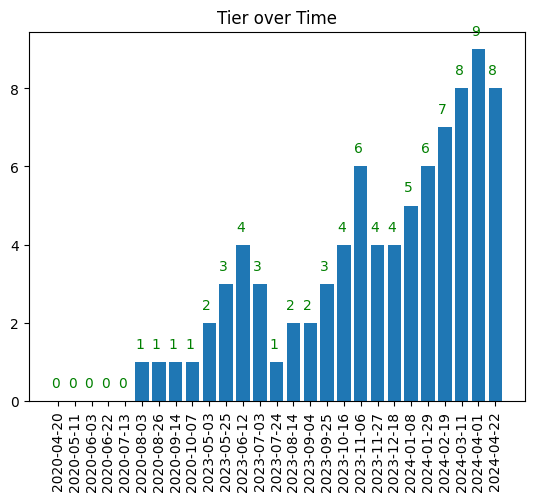

In [140]:
# take every 3 measurement so chart is not too crowded
df=leaderboard.iloc[::3] 


# Create a bar plot
plt.bar(df.index, df['tier'])
plt.title("Tier over Time")

# Annotate every 10th x-value
for i, (index, value) in enumerate(df['tier'].iteritems()):
    plt.annotate(int(value), (index, value), xytext=(-5, 10), 
                     textcoords='offset points',
                     color='green')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_63545/1110488125.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (index, value) in enumerate(df['score'].iteritems()):


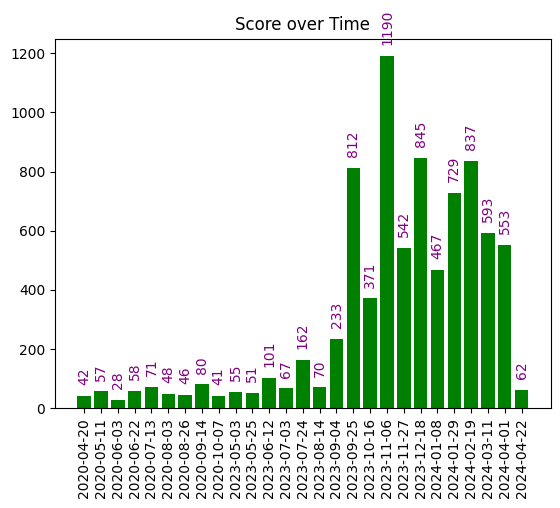

In [145]:
# Create a bar plot
plt.bar(df.index, df['score'],color='green')

plt.title("Score over Time")

# Annotate every 10th x-value
for i, (index, value) in enumerate(df['score'].iteritems()):
    plt.annotate(int(value), (index, value), xytext=(-5, 10), 
                     textcoords='offset points',
                     color='purple', rotation=90)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()